- 아래는 코랩 한글폰트 설치
- 실행 후 런타임 재시작 필요

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data3.csv', encoding='utf-8-sig')  # 인코딩은 상황에 따라 조정

In [3]:
# 가격, 개수, 용량 컬럼을 100ml당 가격으로 통일하기
df['100ml당 가격']  = (df['가격'] * 100) // (df['개수'] * df['용량(ml)'])
df['총 용량'] = df['개수'] * df['용량(ml)']

del df['가격']
del df['용량(ml)']

print(df)

       productId                                             제목  개수  타겟  \
0    84195356355                                 딥디크 플레르드뽀 오드퍼퓸   1  공용   
1    82243246039  떼시스 블랑쉬 니치향수 코튼 비누향 베이비파우더 명품 수제 승무원 살냄새 오드퍼퓸   1  여성   
2    83879217159                                  딥디크 오르페옹 오드퍼퓸   1  공용   
3    89243673097                                  디올 소바쥬 오 드 퍼퓸   1  남성   
4    83103411378                     포맨트 포맨 시그니처 퍼퓸 코튼허그  블랙 향수   1  남성   
..           ...                                            ...  ..  ..   
293  88929371327               샤넬 1957 레 젝스클루시프 드 샤넬 오드 빠르펭  향수   1  여성   
294  86272108348                          샤넬 알뤼르 옴므 스포츠 오 드 뚜왈렛   1  남성   
295  89179693458                                바이레도 블랑쉬 오 드 퍼퓸   1  여성   
296  88642439381                  라페르  프리미엄 니치향수 지속력 좋은 니치퍼퓸 향수   2  공용   
297  87527669811                  춘몽 비누향 살냄새 향수 도플 퍼퓸 블랙베리 앤 베이   1  공용   

                                                   URL    평점      리뷰수  \
0    https://smartstore.na

In [4]:
# '평점', '리뷰수', '향/냄새 만족도(%)', '지속력 만족도(%)' 열
# 학습할 데이터가 없을 경우(NaN)
# dropna를 이용하여 해당 행 제거
df = df.dropna(subset=['평점', '리뷰수', '향/냄새 만족도(%)', '지속력 만족도(%)'])

# 소수점이 존재하지 않는 데이터는 int형으로 변환
df['리뷰수'] = df['리뷰수'].astype(int)
df['향/냄새 만족도(%)'] = df['향/냄새 만족도(%)'].astype(int)
df['지속력 만족도(%)'] = df['지속력 만족도(%)'].astype(int)
df['총 용량'] = df['총 용량'].astype(int)
df['개수'] = df['개수'].astype(int)

# 학습에 필요하지 않는 데이터 제거
del df['productId']
del df['제목']
del df['URL']

print(df)

     개수  타겟    평점    리뷰수  향/냄새 만족도(%)  지속력 만족도(%)  100ml당 가격  총 용량
0     1  공용  4.92   1877           80          65     237333    75
1     1  여성  4.69  35165           55          57      33333    30
2     1  공용  4.94    687           82          68     241333    75
3     1  남성  4.63     30           74          57     122800   100
4     1  남성  4.80   2102           69          56      67980    50
..   ..  ..   ...    ...          ...         ...        ...   ...
293   1  여성  4.92     13           85          62     757142    35
294   1  남성  5.00     17           95          89     238000    50
295   1  여성  4.80     41           71          49     195800   100
296   2  공용  4.86     36           73          53      40000    60
297   1  공용  4.79   7251           68          52     109000    10

[293 rows x 8 columns]


<ipython-input-4-3404466580>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['리뷰수'] = df['리뷰수'].astype(int)
<ipython-input-4-3404466580>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['향/냄새 만족도(%)'] = df['향/냄새 만족도(%)'].astype(int)
<ipython-input-4-3404466580>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

encoder = OneHotEncoder()  # sparse=True by default

encoded_array = encoder.fit_transform(df[['타겟']]).toarray()

# 타겟 컬럼의 데이터를 원핫인코딩을 통해 컬럼으로 새롭게 생성
encoded_col_names = encoder.get_feature_names_out(['타겟'])

# DataFrame으로 변환
encoded_df = pd.DataFrame(encoded_array, columns=encoded_col_names)
encoded_df.index = df.index  # 인덱스 맞춰주기

# 병합
df = pd.concat([df, encoded_df], axis=1)

del df['타겟']

# 편의를 위해 예측하고자 하는 컬럼(값)을 맨 마지막 컬럼으로 이동
df = df[[c for c in df.columns if c != '100ml당 가격'] + ['100ml당 가격']]

print(df)

     개수    평점    리뷰수  향/냄새 만족도(%)  지속력 만족도(%)  총 용량  타겟_공용  타겟_남성  타겟_여성  \
0     1  4.92   1877           80          65    75    1.0    0.0    0.0   
1     1  4.69  35165           55          57    30    0.0    0.0    1.0   
2     1  4.94    687           82          68    75    1.0    0.0    0.0   
3     1  4.63     30           74          57   100    0.0    1.0    0.0   
4     1  4.80   2102           69          56    50    0.0    1.0    0.0   
..   ..   ...    ...          ...         ...   ...    ...    ...    ...   
293   1  4.92     13           85          62    35    0.0    0.0    1.0   
294   1  5.00     17           95          89    50    0.0    1.0    0.0   
295   1  4.80     41           71          49   100    0.0    0.0    1.0   
296   2  4.86     36           73          53    60    1.0    0.0    0.0   
297   1  4.79   7251           68          52    10    1.0    0.0    0.0   

     100ml당 가격  
0       237333  
1        33333  
2       241333  
3       122800  
4 

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글설정
plt.rc('font', family='NanumBarunGothic')

# 여기부터 추가적인 분석을 진행한 부분

In [7]:
women_df = df[df['타겟_여성'] == 1]
del women_df['타겟_여성']
del women_df['타겟_남성']
del women_df['타겟_공용']
men_df = df[df['타겟_남성'] == 1]
del men_df['타겟_여성']
del men_df['타겟_남성']
del men_df['타겟_공용']
uni_df = df[df['타겟_공용'] == 1]
del uni_df['타겟_여성']
del uni_df['타겟_남성']
del uni_df['타겟_공용']

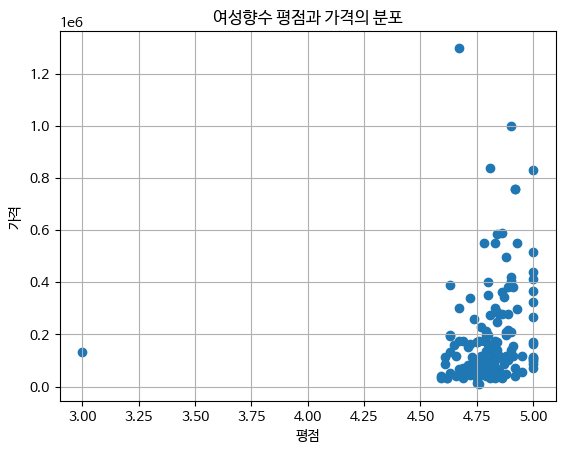

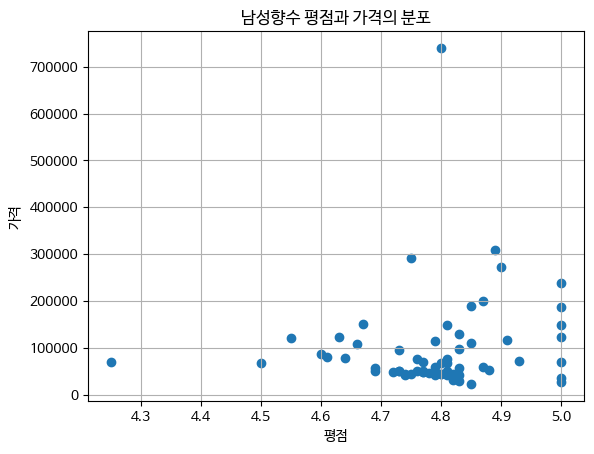

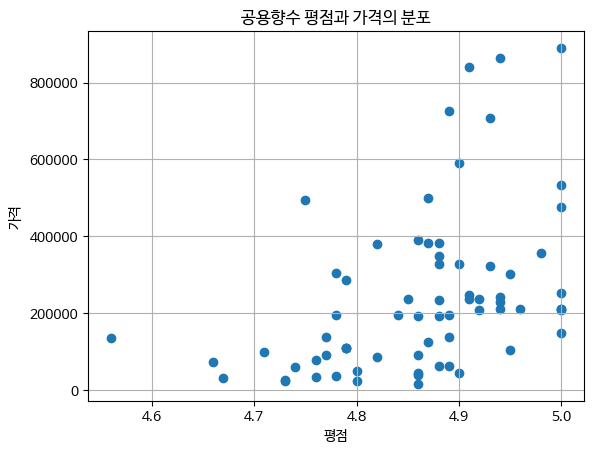

In [8]:
# 여성향수 산점도 그리기
plt.scatter(women_df['평점'], women_df['100ml당 가격'])
plt.xlabel('평점')
plt.ylabel('가격')
plt.title('여성향수 평점과 가격의 분포')
plt.grid(True)
plt.show()

# 남성향수 산점도 그리기
plt.scatter(men_df['평점'], men_df['100ml당 가격'])
plt.xlabel('평점')
plt.ylabel('가격')
plt.title('남성향수 평점과 가격의 분포')
plt.grid(True)
plt.show()

# 공용향수 산점도 그리기
plt.scatter(uni_df['평점'], uni_df['100ml당 가격'])
plt.xlabel('평점')
plt.ylabel('가격')
plt.title('공용향수 평점과 가격의 분포')
plt.grid(True)
plt.show()

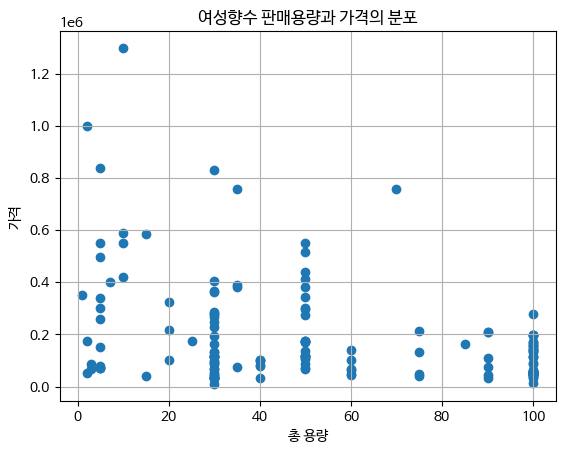

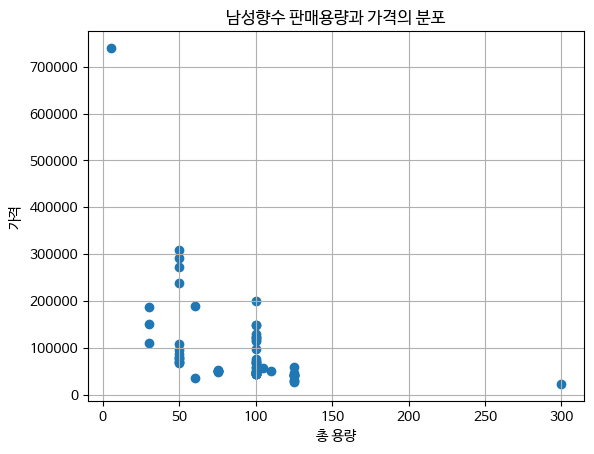

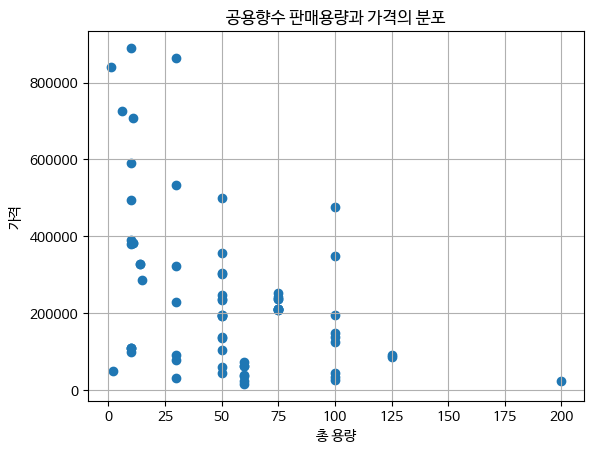

In [9]:
# 여성향수 산점도 그리기
plt.scatter(women_df['총 용량'], women_df['100ml당 가격'])
plt.xlabel('총 용량')
plt.ylabel('가격')
plt.title('여성향수 판매용량과 가격의 분포')
plt.grid(True)
plt.show()

# 남성향수 산점도 그리기
plt.scatter(men_df['총 용량'], men_df['100ml당 가격'])
plt.xlabel('총 용량')
plt.ylabel('가격')
plt.title('남성향수 판매용량과 가격의 분포')
plt.grid(True)
plt.show()

# 공용향수 산점도 그리기
plt.scatter(uni_df['총 용량'], uni_df['100ml당 가격'])
plt.xlabel('총 용량')
plt.ylabel('가격')
plt.title('공용향수 판매용량과 가격의 분포')
plt.grid(True)
plt.show()

In [10]:
print((df['타겟_여성']).sum())
print((df['타겟_남성']).sum())
print((df['타겟_공용']).sum())

158.0
65.0
70.0


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


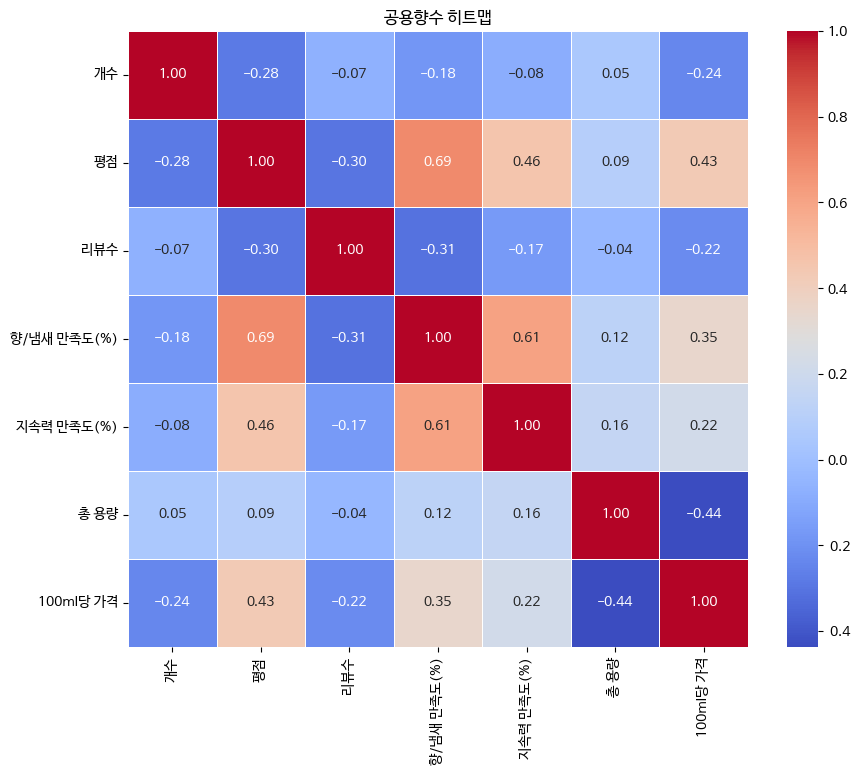

In [11]:
# 1. 공용향수 상관계수 계산
corr = uni_df.corr()

# 2. 히트맵 시각화
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('공용향수 히트맵')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


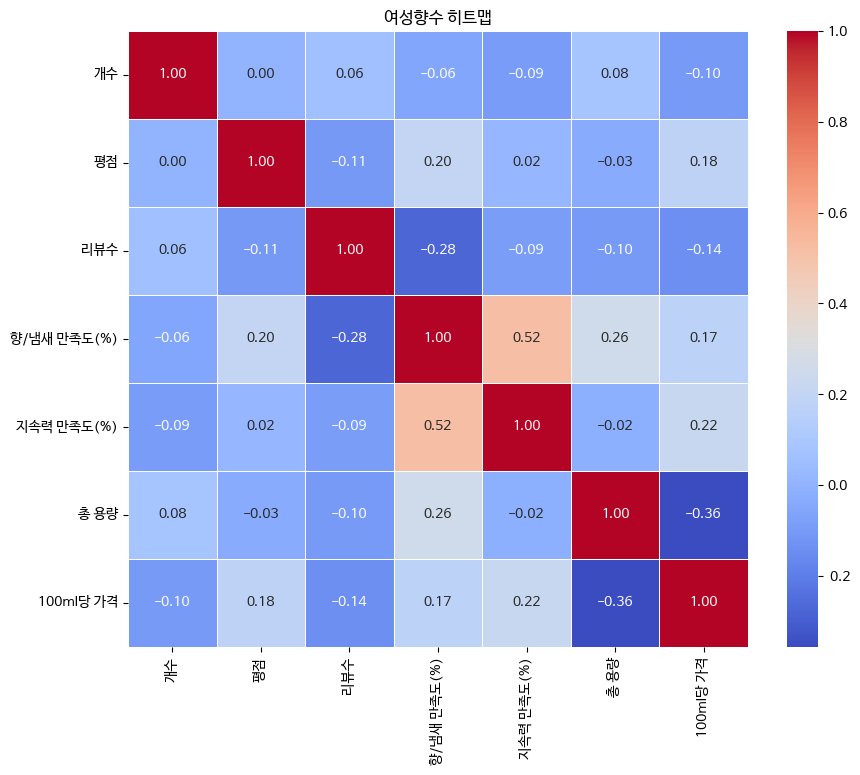

In [12]:
# 1. 여성향수 상관계수 계산
corr = women_df.corr()

# 2. 히트맵 시각화
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('여성향수 히트맵')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


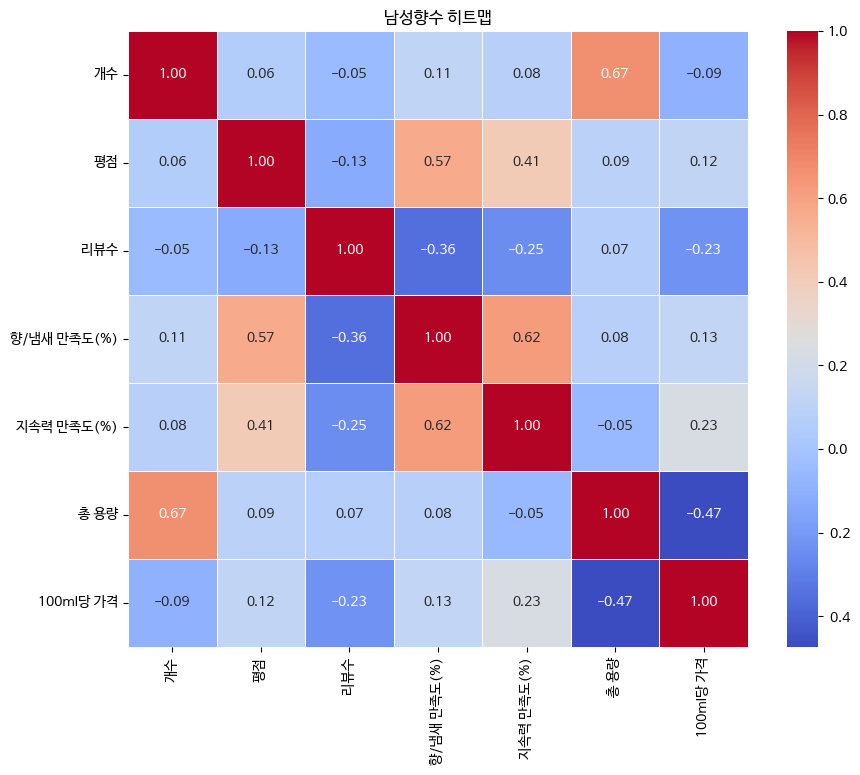

In [13]:
# 1. 남성향수 상관계수 계산
corr = men_df.corr()

# 2. 히트맵 시각화
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('남성향수 히트맵')
plt.show()

- 여성, 남성 향수는 명품인지 아닌지에 따라 가격이 많이 차이나는 듯 하나, 공용향수는 브랜드의 영향력을 덜 타는 듯 하여 예측모델 생성에 더 적합하다고 판단된다.
- 비록 공용향수의 데이터는 적으나, 상관관계가 명확하므로 이로 예측모델 생성을 진행한다.

In [17]:
# 정규화 진행
from sklearn.preprocessing import MinMaxScaler

# 예제 데이터프레임

# 스케일러 생성
scaler = MinMaxScaler()

# 컬럼을 2D 배열로 변환 후 fit_transform
uni_df['리뷰수'] = scaler.fit_transform(uni_df[['리뷰수']])

print(uni_df)

     개수    평점       리뷰수  향/냄새 만족도(%)  지속력 만족도(%)  총 용량  100ml당 가격
0     1  4.92  0.109323           80          65    75     237333
2     1  4.94  0.039939           82          68    75     241333
5     1  4.76  1.000000           61          56   100      33800
7     1  4.79  0.421900           68          52    10     109000
8     1  4.80  0.157192           67          54   200      24900
..   ..   ...       ...          ...         ...   ...        ...
288   1  5.00  0.000175           60          60    75     252000
289   1  4.98  0.003382           89          87    50     356000
291   2  4.73  0.039065           62          55    60      24833
296   2  4.86  0.001982           73          53    60      40000
297   1  4.79  0.422658           68          52    10     109000

[70 rows x 7 columns]


<ipython-input-17-3693643740>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_df['리뷰수'] = scaler.fit_transform(uni_df[['리뷰수']])


In [18]:
# 저장
uni_df.to_csv('preprocessing_data2.csv', index=False, encoding='utf-8-sig')